## Classify Handwritten digits (MNIST) using MLP

In [1]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.
C:\Users\Vihan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Vihan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Vihan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Vihan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# Data Loading and Preprocessing

In [2]:
# Loads the training and test data sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
first_image = X_train[0, :, :]

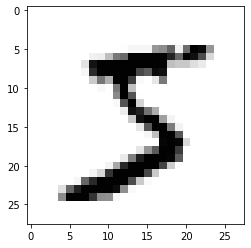

In [4]:
# To interpret the values as a 28x28 image, we need to reshape
# the numpy array, which is one dimensional.
plt.imshow(first_image, cmap=plt.cm.Greys);

In [5]:
num_classes = len(np.unique(y_train))
num_classes

10

In [6]:
# 60K training 28 x 28 (pixel) images
X_train.shape

(60000, 28, 28)

In [7]:
# 10K test 28 x 28 (pixel) images
X_test.shape

(10000, 28, 28)

In [8]:
input_dim = np.prod(X_train.shape[1:])
input_dim

784

In [9]:
# The training and test data sets are integers, ranging from 0 to 255.
# We reshape the training and test data sets to be matrices with 784 (= 28 * 28) features.
X_train = X_train.reshape(60000, input_dim).astype('float32')
X_test = X_test.reshape(10000, input_dim).astype('float32')


In [10]:
# Scales the training and test data to range between 0 and 1.
max_value = X_train.max()
X_train /= max_value
X_test /= max_value

In [11]:
# The training and test labels are integers from 0 to 9 indicating the class label
(y_train, y_test)

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [12]:
# We convert the class labels to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# Multilayer Perceptron

Technically, we're building a perceptron with one hidden layer.

In [13]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model.add(Dense(num_classes, activation='softmax'))

## Different Ways to Summarize Model

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [17]:
# import json
# json.loads(model.to_json())

## Train Classifier

In [16]:
# Trains the model, iterating on the training data in batches of 32 in 3 epochs.
# Using the Adam optimizer.
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=3, verbose=1)


Epoch 1/3
60000/60000 [==============================] - 13s 224us/step - loss: 0.2009 - accuracy: 0.9408
Epoch 2/3
60000/60000 [==============================] - 14s 228us/step - loss: 0.0818 - accuracy: 0.9750
Epoch 3/3
60000/60000 [==============================] - 12s 208us/step - loss: 0.0528 - accuracy: 0.9832


## Model Evaluation

In [17]:
# Test accuracy is ~97%.
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 49us/step


[0.08310179765983484, 0.9757000207901001]

## Predicting a Couple of Held-Out Images

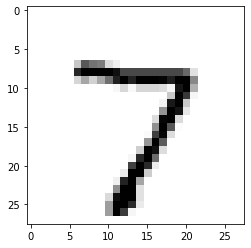

In [18]:
first_test_image = X_test[0, :]
plt.imshow(first_test_image.reshape(28, 28), cmap=plt.cm.Greys);

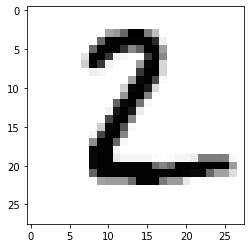

In [19]:
second_test_image = X_test[1, :]
plt.imshow(second_test_image.reshape(28, 28), cmap=plt.cm.Greys);

In [20]:
model.predict_classes(X_test[[0, 1], :])

array([7, 2], dtype=int64)